In [106]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [92]:
def convert_img(name):
    '''
    Converts an image to a binary matrix with optional resizing.

    Parameters:
    - name: str, the filename or path of the image to be converted.

    Returns:
    - numpy.ndarray or None: A 2D NumPy array representing the binary image if successful,
      or None if an error occurs during the conversion.

    This function reads an image in grayscale, applies thresholding to create a binary image,
    and optionally resizes it to a fixed size. If the file is not found or cannot be read,
    a FileNotFoundError is raised. Any other exceptions during the conversion process
    are caught, and an error message is printed before returning None.
    '''
    try:
        thresh = 128

        img_grey = cv2.imread(name, cv2.IMREAD_GRAYSCALE)
        if img_grey is None:
            raise FileNotFoundError(f"File '{name}' not found or cannot be read.")

        img_binary = cv2.threshold(img_grey, thresh, 255, cv2.THRESH_BINARY)[1]
        img_binary = cv2.resize(img_binary, dsize=(1000, 1000)).astype(np.uint16)

        return img_binary
    except Exception as e:
        print(f"An error occurred: {e}")
        return None



def plot_smooth_heatmap(matrix, title="Heatmap", save_figure=False, filename='heatmap.png'):
    '''
    Plots a smooth heatmap for the given matrix using Matplotlib.

    Parameters:
    - matrix: 2D NumPy array, the matrix to be visualized.
    - title: str, optional, the title of the heatmap (default is "Heatmap").
    - save_figure: bool, optional, flag to save the generated plot (default is False).
    - filename: str, optional, filename for saving the plot (default is "heatmap.png").

    Returns:
    - None

    This function generates a heatmap with based on the provided matrix.
    It uses Matplotlib to create the plot, with options to customize the title, labels, and color mapping.
    If save_figure is True, the plot is saved with the specified filename.
    '''
    fig, ax = plt.subplots(figsize=(8, 6))
    im = ax.imshow(matrix, cmap='viridis', interpolation='bilinear')
    plt.colorbar(im, ax=ax, orientation='vertical')
    plt.axis('off')
    ax.set_title(title)
    plt.tight_layout()

    if save_figure:
        plt.savefig(filename)

    plt.show()


100%|██████████| 2/2 [00:00<00:00, 14.84it/s]


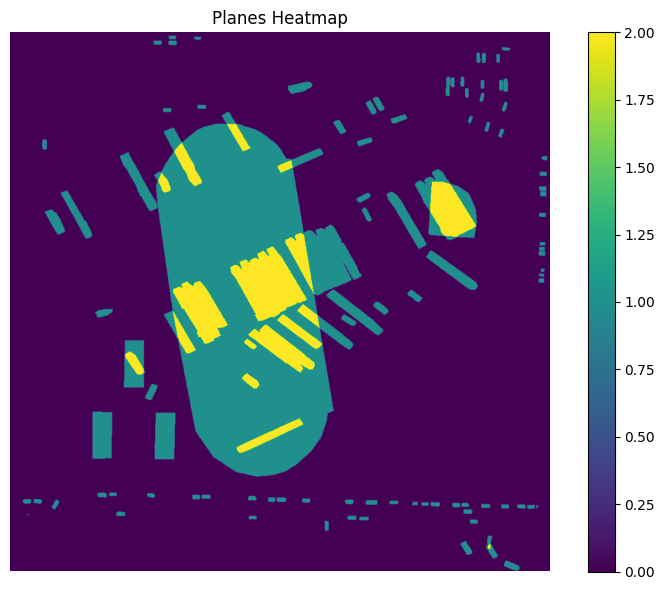

100%|██████████| 1/1 [00:00<00:00,  2.41it/s]


In [112]:
heat_map_matrix = np.zeros((1000, 1000), dtype=np.uint16)

clases = ['Planes'] #заглушка
file_names = ['P0011_instance_id_RGB.png', 'P0029_instance_id_RGB.png'] #заглушка. Надо сделать проход по S3

for cls in tqdm(clases):
    for file in tqdm(file_names):
        img = convert_img(file) / 255
        img = img.astype('uint16')
        heat_map_matrix += img

    plot_smooth_heatmap(heat_map_matrix, title=f'{cls} Heatmap')
